In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
path = 'C:/Users/Patrycja/Desktop/Uni Koblenz/CSS/food_big_small_two_months/july_big_small_city.csv'

In [59]:
df = pd.read_csv(path, sep=',', encoding='ISO-8859-1')#, engine='python'
set([date for date, time in (date_time.split(' ') for date_time in df.date.unique())])

{'2013-07-01',
 '2013-07-02',
 '2013-07-03',
 '2013-07-04',
 '2013-07-05',
 '2013-07-06',
 '2013-07-07',
 '2013-07-08',
 '2013-07-09',
 '2013-07-10',
 '2013-07-11',
 '2013-07-12',
 '2013-07-13',
 '2013-07-14',
 '2013-07-15',
 '2013-07-16',
 '2013-07-17',
 '2013-07-18',
 '2013-07-19',
 '2013-07-20',
 '2013-07-21',
 '2013-07-22',
 '2013-07-23',
 '2013-07-24',
 '2013-07-25',
 '2013-07-26',
 '2013-07-27',
 '2013-07-28',
 '2013-07-29',
 '2013-07-30',
 '2013-07-31'}

## Add new columns

In [60]:
df['day'] = [day for day, hour in (date.split(' ') for date in df.date)]

In [61]:
df['hour'] = [hour for day, hour in (date.split(' ') for date in df.date)]

In [35]:
df.head()

,country,country_region,zip,city,date,target_link,origin_link,host_type,recipe_id,day,hour
0,DE,16,-1,Berlin,2013-07-28 13:59:59,/rezept/404417/Knuspriger-Spanferkelrollbraten...,http://www.kochbar.de/rezepte/spanferkelrollbr...,Mozilla/5.0 (Windows NT 5.1; rv:22.0) Gecko/20...,404417,2013-07-28,13:59:59
1,DE,16,-1,Berlin,2013-07-28 13:59:59,/rezept/404417/Knuspriger-Spanferkelrollbraten...,http://www.kochbar.de/rezepte/spanferkelrollbr...,Mozilla/5.0 (Windows NT 5.1; rv:22.0) Gecko/20...,404417,2013-07-28,13:59:59
2,DE,4,22117,Hamburg,2013-07-02 04:06:39,/rezept/106165/Spargelsalat-mit-Rinderfilet-un...,http://www.google.de/url?sa=t&rct=j&q=salat%20...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:21.0) G...,106165,2013-07-02,04:06:39
3,DE,5,-1,Frankfurt_Am_Main,2013-07-14 10:00:38,/rezept/470972/Nudelsalat-mit-Gemuese.html,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,470972,2013-07-14,10:00:38
4,DE,16,14169,Berlin,2013-07-22 16:00:17,/rezept/417178/Ravioli-gefuellt-mit-Pilzen.html,-,Mozilla/5.0 (iPad; CPU OS 6_1_3 like Mac OS X)...,417178,2013-07-22,16:00:17


## Check number of examples for each city

In [36]:
dfByCity = df.groupby(['city'])

In [46]:
cities = dict()
for name, group in dfByCity:
    #print(name, ':', group)
    cities[name] = len(group)
cities

{'Berlin': 395616,
 'Bremerhaven': 7888,
 'Darmstadt': 31676,
 'Erlangen': 19461,
 'Frankfurt_Am_Main': 152313,
 'Hamburg': 207819,
 'KÃ¶ln': 123214,
 'Munich': 252958,
 'Potsdam': 10207,
 'Siegen': 13333}

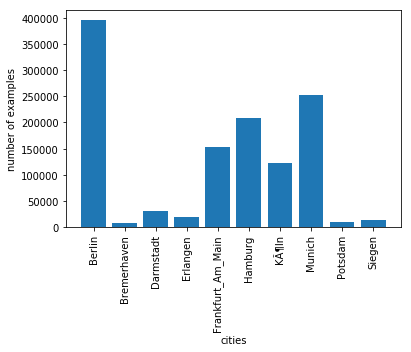

In [55]:
plt.bar(range(len(cities.values())), cities.values())#, 'o')
plt.ylabel('number of examples')
plt.xlabel('cities')
plt.xticks(range(len(cities.keys())), cities.keys(), rotation='vertical')
plt.show()

In [ ]:
#TODO: posortować miasta według liczby mieszkańców, może wtedy jakaś tendencja

## Check number of examples for each day

In [62]:
dfByDay = df.groupby(['day'])

In [63]:
days = dict()
for name, group in dfByDay:
    days[name] = len(group)
days

{'2013-07-01': 35561,
 '2013-07-02': 34001,
 '2013-07-03': 39952,
 '2013-07-04': 38073,
 '2013-07-05': 41907,
 '2013-07-06': 38891,
 '2013-07-07': 31573,
 '2013-07-08': 38341,
 '2013-07-09': 40713,
 '2013-07-10': 38226,
 '2013-07-11': 40507,
 '2013-07-12': 41859,
 '2013-07-13': 38021,
 '2013-07-14': 39317,
 '2013-07-15': 38743,
 '2013-07-16': 37832,
 '2013-07-17': 37378,
 '2013-07-18': 41424,
 '2013-07-19': 46115,
 '2013-07-20': 43123,
 '2013-07-21': 34971,
 '2013-07-22': 37849,
 '2013-07-23': 39528,
 '2013-07-24': 39292,
 '2013-07-25': 40540,
 '2013-07-26': 41273,
 '2013-07-27': 38342,
 '2013-07-28': 37067,
 '2013-07-29': 42124,
 '2013-07-30': 41836,
 '2013-07-31': 40106}

In [64]:
def barchart_from_dict(dictionary, xlabel, ylabel, xticks=False, rotation='vertical'):
    plt.bar(range(len(dictionary.values())), dictionary.values())
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if xticks:
        plt.xticks(range(len(dictionary.keys())), dictionary.keys(), rotation=rotation)
    plt.show()

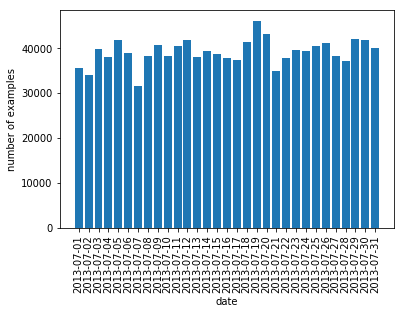

In [65]:
barchart_from_dict(days, 'date', 'number of examples', xticks=True)

## Check number of examples for each city and each day

In [72]:
dfByCity = df.groupby(['city'])

In [78]:
cities_days = dict()
for name, group in dfByCity:
    dfByCityByDay = group.groupby('day')
    temp = dict() #dict.fromkeys
    for day_name, day_group in dfByCityByDay:    
        temp[day_name] = len(day_group)
    cities_days[name] = temp
    
cities_days

{'Berlin': {'2013-07-01': 10502,
  '2013-07-02': 10738,
  '2013-07-03': 11567,
  '2013-07-04': 12367,
  '2013-07-05': 12847,
  '2013-07-06': 11482,
  '2013-07-07': 10325,
  '2013-07-08': 11572,
  '2013-07-09': 11499,
  '2013-07-10': 12442,
  '2013-07-11': 13456,
  '2013-07-12': 14379,
  '2013-07-13': 12540,
  '2013-07-14': 14445,
  '2013-07-15': 12567,
  '2013-07-16': 11595,
  '2013-07-17': 12642,
  '2013-07-18': 13579,
  '2013-07-19': 13637,
  '2013-07-20': 17705,
  '2013-07-21': 11142,
  '2013-07-22': 12561,
  '2013-07-23': 13017,
  '2013-07-24': 12419,
  '2013-07-25': 13547,
  '2013-07-26': 13691,
  '2013-07-27': 12888,
  '2013-07-28': 12192,
  '2013-07-29': 14400,
  '2013-07-30': 14171,
  '2013-07-31': 13702},
 'Bremerhaven': {'2013-07-01': 212,
  '2013-07-02': 316,
  '2013-07-03': 382,
  '2013-07-04': 234,
  '2013-07-05': 302,
  '2013-07-06': 210,
  '2013-07-07': 174,
  '2013-07-08': 222,
  '2013-07-09': 312,
  '2013-07-10': 251,
  '2013-07-11': 193,
  '2013-07-12': 250,
  '2013-0

In [80]:
labels = [name for name in cities_days.keys()]
labels

['Berlin',
 'Bremerhaven',
 'Darmstadt',
 'Erlangen',
 'Frankfurt_Am_Main',
 'Hamburg',
 'KÃ¶ln',
 'Munich',
 'Potsdam',
 'Siegen']

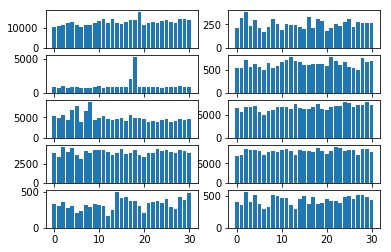

In [113]:
for i in range(1, 11):
    plt.subplot(5, 2, i)
    plt.bar(range(len(cities_days[labels[i-1]].values())), cities_days[labels[i-1]].values())

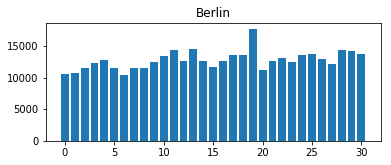

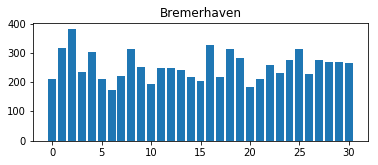

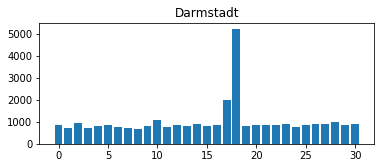

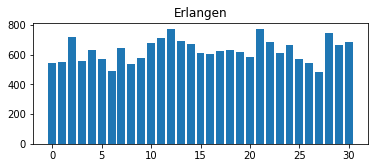

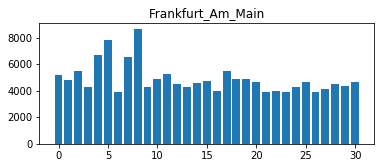

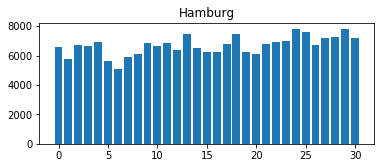

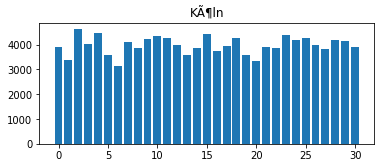

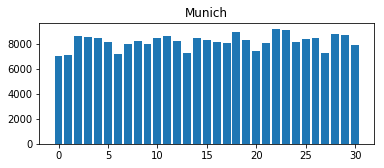

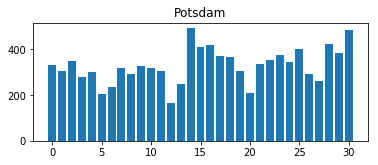

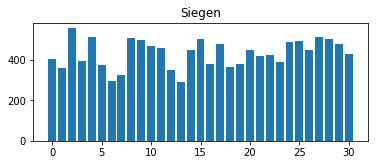

In [110]:
for i in range(1, 11):
    f, ax = plt.subplots(figsize=(10,10))
    plt.subplot(5, 2, i)
    plt.title(labels[i-1])
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.bar(range(len(cities_days[labels[i-1]].values())), cities_days[labels[i-1]].values())